In [4]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import os

In [6]:
temp_diffs = {}
powers = {}
fractions = {}

inputdir = "regions-data/"
filelist = sorted(os.listdir(inputdir))
filelist = [inputdir+f for f in filelist]

df = pd.read_csv(filelist[0])
for reg in df['Region']:
    powers[reg] = []
    temp_diffs[reg] = []
    fractions[reg] = float(df.loc[df['Region'] == reg]['Pixel Count'])/float(df.loc[df['Region'] == 'main']['Pixel Count'])
regions = list(powers.keys())
fractions

{'main': 1.0,
 'reg1': 0.16558861578266496,
 'reg2': 0.1588328302429208,
 'reg3': 0.14762110104930287,
 'reg4': 0.1540894063533132,
 'reg5': 0.15279574529251114,
 'reg6': 0.13525945091274974}

In [8]:
for f in filelist:
    df = pd.read_csv(f)
    for reg in regions:
        powers[reg].append(float(df.loc[df['Region'] == reg]['Power']))
        temp_diffs[reg].append(float(df.loc[df['Region'] == reg]['Avg T']))

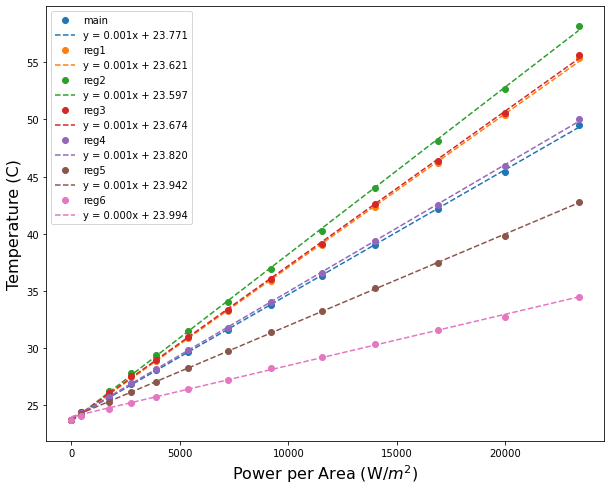

In [47]:
tot_heat_area = (385/460)*0.02*0.035; #proportion of heater area that produces heat (m^2)

plt.figure(1,(10,8))
slopes = {}
pows_per_area = []
for reg in regions:
    pow_per_area = np.array(powers[reg])/tot_heat_area
    dTs = np.array(temp_diffs[reg])
    data = plt.plot(pow_per_area,dTs,"o",label=reg)
    x_for_fit = pow_per_area[pow_per_area > 1/tot_heat_area]
    y_for_fit = dTs[pow_per_area > 1/tot_heat_area]
    coeffs = np.polyfit(x_for_fit,y_for_fit,1)
    slopes[reg] = coeffs[0]
    pows_per_area = pow_per_area
    x_fit = np.linspace(np.min(pow_per_area),np.max(pow_per_area),num=50)
    plt.plot(x_fit,coeffs[0]*x_fit + coeffs[1],"--",color=data[0].get_color(),label="y = {0:.3f}x + {1:.3f}".format(coeffs[0],coeffs[1]))
plt.xlabel(r"Power per Area (W/$m^2$)",fontsize=16)
plt.ylabel("Temperature (C)",fontsize=16)
plt.legend()

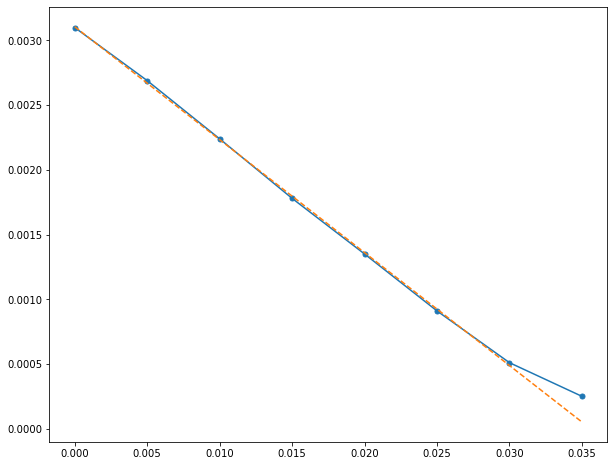

In [48]:
heater_y = 0.001*np.array([0,5,10,15,20,25,30,35]) #measured positions along heater, starting from top (deepest) point, in m
depths = 0.001*np.array([3.10,2.69,2.24,1.78,1.35,0.91,0.51,0.25]) #measured depths of trench at y positions listed above, in m

plt.figure(2,(10,8))
plt.plot(heater_y,depths,marker='.',markersize=10)
fit_params = np.polyfit(heater_y[0:-1],depths[0:-1],1)
x_test = np.linspace(heater_y[0],heater_y[-1],num=50)
plt.plot(x_test,fit_params[0]*x_test+fit_params[1],linestyle='--')

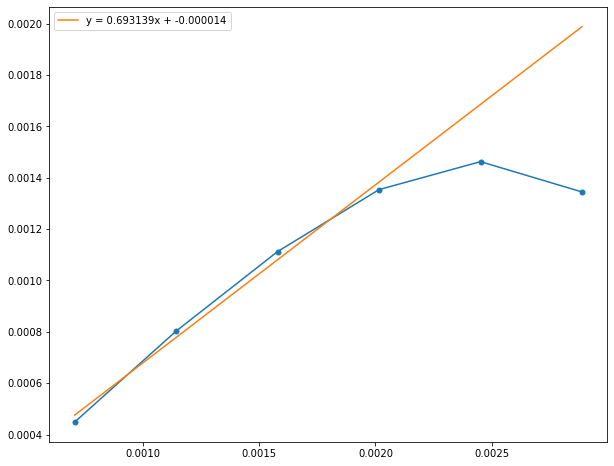

In [51]:
regions_y = np.array([0.5*(heater_y[i]+heater_y[i+1]) for i in range(len(heater_y)-2)]) #avg y position of centers of regions
regions_depth = fit_params[0]*regions_y + fit_params[1]
regs = ['reg{0}'.format(i+1) for i in range(6)]
slopes_ordered = [slopes[reg] for reg in regs]
plt.figure(3,(10,8))
plt.plot(regions_depth,slopes_ordered,marker='.',markersize=10)
fit3 = np.polyfit(regions_depth[2:],slopes_ordered[2:],1)
plt.plot(regions_depth,fit3[0]*regions_depth + fit3[1],label="y = {0:.6f}x + {1:.6f}".format(fit3[0],fit3[1]))
plt.legend()

In [36]:
slopes_ordered

[0.0013446837380769149,
 0.0014626052584454981,
 0.0013537129979219384,
 0.0011125635313733236,
 0.000802756819714294,
 0.0004486299335930052]

In [37]:
regions_y

array([ 2.5,  7.5, 12.5, 17.5, 22.5, 27.5])